In [19]:
# ---
# 2️⃣ Load microgravity data and calculate mean logFC for each transporter

import pandas as pd

# Load your Excel data
logFC_df = pd.read_excel("CIMItadine (1).xlsx")

# Inspect columns
print("Columns:", logFC_df.columns)

# ✅ Average logFC for transporters of interest
oct1_values = logFC_df.loc[logFC_df['Gene'].str.contains('SLC22A1'), 'Log2fc_(Space Flight)v(Ground Control)']
mate1_values = logFC_df.loc[logFC_df['Gene'].str.contains('SLC47A1'), 'Log2fc_(Space Flight)v(Ground Control)']

print(f"OCT1 values:\n{oct1_values}")
print(f"MATE1 values:\n{mate1_values}")

# Calculate means
clean_logFC = {
    'OCT1': oct1_values.mean(),
    'MATE1': mate1_values.mean()
}

print("✅ Mapped logFC for PBPK (averaged):", clean_logFC)


Columns: Index(['Gene', 'Log2fc_(Space Flight)v(Ground Control)',
       'P.value_(Space Flight)v(Ground Control)',
       'Adj.p.value_(Space Flight)v(Ground Control)'],
      dtype='object')
OCT1 values:
15    0.129985
16   -0.152616
Name: Log2fc_(Space Flight)v(Ground Control), dtype: float64
MATE1 values:
19   -0.081716
20    0.048833
Name: Log2fc_(Space Flight)v(Ground Control), dtype: float64
✅ Mapped logFC for PBPK (averaged): {'OCT1': -0.011315866999999993, 'MATE1': -0.016441424500000003}


In [20]:
clean_logFC = {
    'OCT1': -0.011315867,
    'MATE1': -0.016441425
}


In [22]:
from CimetidineKineticModel import CimetidineKineticModel

model = CimetidineKineticModel(logFC_dict=clean_logFC)


In [23]:
t, C_plasma = model.simulate()


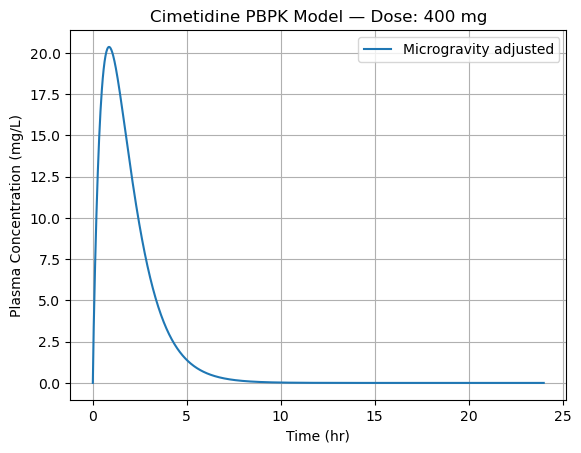

In [24]:
model.plot_model(label="Microgravity adjusted")


In [25]:
pk = model.calculate_pk_metrics()
print(pk)


{'AUC': 50.59511461828911, 'Cmax': 20.366346226053775, 'Tmax': 0.8648648648648649, 'Half-life': 0.8357482903334836, 'CL/F': 4.000386233473153}


In [ ]:
t, C_plasma = model.simulate()


In [ ]:
t, C_plasma = model.simulate()


In [ ]:
t, C_plasma = model.simulate()


In [ ]:
t, C_plasma = model.simulate()


In [ ]:
t, C_plasma = model.simulate()


In [ ]:
t, C_plasma = model.simulate()


In [ ]:
t, C_plasma = model.simulate()


In [85]:
t, C_plasma = model.simulate()


In [26]:
import pandas as pd

# Load data
logFC_df = pd.read_excel("CIMItadine (1).xlsx")

# View unique genes
print(logFC_df['Gene'].unique())


['ABCB1 ( GLDS 13 ) ' 'ABCB1 ( GLDS 52 ) ' 'CYP1A2 ( GLDS 13 )'
 'CYP1A2 ( GLDS 52 )' 'CYP2C9 ( GLDS 13 ) ' 'CYP2C9 ( GLDS 52 ) '
 'CYP2D6 ( GLDS 13 ) ' 'CYP2D6 ( GLDS 52 ) ' 'SLC22A1 ( GLDS 13 ) '
 'SLC22A1 ( GLDS 52 ) ' 'SLC22A3 ( GLDS 13 ) ' 'SLC22A3 ( GLDS 52) '
 'SLC47A1 ( GLDS 13 )' 'SLC47A1 ( GLDS 52 )']


In [28]:
import pandas as pd

# Load your Excel file
df = pd.read_excel("CIMItadine (1).xlsx")

# Remove leading/trailing spaces for robust matching
df['Gene'] = df['Gene'].str.strip()

# Compute mean logFC per gene
mean_logFC_df = df.groupby('Gene')['Log2fc_(Space Flight)v(Ground Control)'].mean().reset_index()

print(mean_logFC_df)


                   Gene  Log2fc_(Space Flight)v(Ground Control)
0     ABCB1 ( GLDS 13 )                                0.038398
1     ABCB1 ( GLDS 52 )                                0.125752
2    CYP1A2 ( GLDS 13 )                               -0.138298
3    CYP1A2 ( GLDS 52 )                               -0.320354
4    CYP2C9 ( GLDS 13 )                               -0.190500
5    CYP2C9 ( GLDS 52 )                               -0.188170
6    CYP2D6 ( GLDS 13 )                               -0.081119
7    CYP2D6 ( GLDS 52 )                                0.114927
8   SLC22A1 ( GLDS 13 )                                0.129985
9   SLC22A1 ( GLDS 52 )                               -0.152616
10  SLC22A3 ( GLDS 13 )                                0.071119
11   SLC22A3 ( GLDS 52)                                0.100890
12  SLC47A1 ( GLDS 13 )                               -0.081716
13  SLC47A1 ( GLDS 52 )                                0.048833


In [30]:
import pandas as pd

# Load your Excel data
df = pd.read_excel("CIMItadine (1).xlsx")

# Clean up gene names (strip spaces)
df['Gene'] = df['Gene'].str.strip()

# Compute mean logFC for each gene
mean_logFC_df = df.groupby('Gene')['Log2fc_(Space Flight)v(Ground Control)'].mean().reset_index()

print(mean_logFC_df)

# Map them to your PBPK transporters/enzymes
raw_logFC = dict(zip(
    mean_logFC_df['Gene'], 
    mean_logFC_df['Log2fc_(Space Flight)v(Ground Control)']
))

# PBPK mapping
clean_logFC = {
    'Pgp': (raw_logFC.get('ABCB1 ( GLDS 13 )', 0.0) + raw_logFC.get('ABCB1 ( GLDS 52 )', 0.0)) / 2,
    'CYP1A2': (raw_logFC.get('CYP1A2 ( GLDS 13 )', 0.0) + raw_logFC.get('CYP1A2 ( GLDS 52 )', 0.0)) / 2,
    'CYP2C9': (raw_logFC.get('CYP2C9 ( GLDS 13 )', 0.0) + raw_logFC.get('CYP2C9 ( GLDS 52 )', 0.0)) / 2,
    'CYP2D6': (raw_logFC.get('CYP2D6 ( GLDS 13 )', 0.0) + raw_logFC.get('CYP2D6 ( GLDS 52 )', 0.0)) / 2,
    'OCT1': (raw_logFC.get('SLC22A1 ( GLDS 13 )', 0.0) + raw_logFC.get('SLC22A1 ( GLDS 52 )', 0.0)) / 2,
    'OCT3': (raw_logFC.get('SLC22A3 ( GLDS 13 )', 0.0) + raw_logFC.get('SLC22A3 ( GLDS 52)', 0.0)) / 2,
    'MATE1': (raw_logFC.get('SLC47A1 ( GLDS 13 )', 0.0) + raw_logFC.get('SLC47A1 ( GLDS 52 )', 0.0)) / 2
}

print("✅ Clean logFC for PBPK (averaged):", clean_logFC)


                   Gene  Log2fc_(Space Flight)v(Ground Control)
0     ABCB1 ( GLDS 13 )                                0.038398
1     ABCB1 ( GLDS 52 )                                0.125752
2    CYP1A2 ( GLDS 13 )                               -0.138298
3    CYP1A2 ( GLDS 52 )                               -0.320354
4    CYP2C9 ( GLDS 13 )                               -0.190500
5    CYP2C9 ( GLDS 52 )                               -0.188170
6    CYP2D6 ( GLDS 13 )                               -0.081119
7    CYP2D6 ( GLDS 52 )                                0.114927
8   SLC22A1 ( GLDS 13 )                                0.129985
9   SLC22A1 ( GLDS 52 )                               -0.152616
10  SLC22A3 ( GLDS 13 )                                0.071119
11   SLC22A3 ( GLDS 52)                                0.100890
12  SLC47A1 ( GLDS 13 )                               -0.081716
13  SLC47A1 ( GLDS 52 )                                0.048833
✅ Clean logFC for PBPK (averaged): {'Pgp

In [ ]:
import pandas as pd

# Load your Excel data
df = pd.read_excel("CIMItadine (1).xlsx")

# Clean up gene names (strip spaces)
df['Gene'] = df['Gene'].str.strip()

# Compute mean logFC for each gene
mean_logFC_df = df.groupby('Gene')['Log2fc_(Space Flight)v(Ground Control)'].mean().reset_index()

print(mean_logFC_df)

# Map them to your PBPK transporters/enzymes
raw_logFC = dict(zip(
    mean_logFC_df['Gene'], 
    mean_logFC_df['Log2fc_(Space Flight)v(Ground Control)']
))

# PBPK mapping
clean_logFC = {
    'Pgp': (raw_logFC.get('ABCB1 ( GLDS 13 )', 0.0) + raw_logFC.get('ABCB1 ( GLDS 52 )', 0.0)) / 2,
    'CYP1A2': (raw_logFC.get('CYP1A2 ( GLDS 13 )', 0.0) + raw_logFC.get('CYP1A2 ( GLDS 52 )', 0.0)) / 2,
    'CYP2C9': (raw_logFC.get('CYP2C9 ( GLDS 13 )', 0.0) + raw_logFC.get('CYP2C9 ( GLDS 52 )', 0.0)) / 2,
    'CYP2D6': (raw_logFC.get('CYP2D6 ( GLDS 13 )', 0.0) + raw_logFC.get('CYP2D6 ( GLDS 52 )', 0.0)) / 2,
    'OCT1': (raw_logFC.get('SLC22A1 ( GLDS 13 )', 0.0) + raw_logFC.get('SLC22A1 ( GLDS 52 )', 0.0)) / 2,
    'OCT3': (raw_logFC.get('SLC22A3 ( GLDS 13 )', 0.0) + raw_logFC.get('SLC22A3 ( GLDS 52)', 0.0)) / 2,
    'MATE1': (raw_logFC.get('SLC47A1 ( GLDS 13 )', 0.0) + raw_logFC.get('SLC47A1 ( GLDS 52 )', 0.0)) / 2
}

print("✅ Clean logFC for PBPK (averaged):", clean_logFC)


                   Gene  Log2fc_(Space Flight)v(Ground Control)
0     ABCB1 ( GLDS 13 )                                0.038398
1     ABCB1 ( GLDS 52 )                                0.125752
2    CYP1A2 ( GLDS 13 )                               -0.138298
3    CYP1A2 ( GLDS 52 )                               -0.320354
4    CYP2C9 ( GLDS 13 )                               -0.190500
5    CYP2C9 ( GLDS 52 )                               -0.188170
6    CYP2D6 ( GLDS 13 )                               -0.081119
7    CYP2D6 ( GLDS 52 )                                0.114927
8   SLC22A1 ( GLDS 13 )                                0.129985
9   SLC22A1 ( GLDS 52 )                               -0.152616
10  SLC22A3 ( GLDS 13 )                                0.071119
11   SLC22A3 ( GLDS 52)                                0.100890
12  SLC47A1 ( GLDS 13 )                               -0.081716
13  SLC47A1 ( GLDS 52 )                                0.048833
✅ Clean logFC for PBPK (averaged): {'Pgp

In [ ]:
import pandas as pd

# Load your Excel data
df = pd.read_excel("CIMItadine (1).xlsx")

# Clean up gene names (strip spaces)
df['Gene'] = df['Gene'].str.strip()

# Compute mean logFC for each gene
mean_logFC_df = df.groupby('Gene')['Log2fc_(Space Flight)v(Ground Control)'].mean().reset_index()

print(mean_logFC_df)

# Map them to your PBPK transporters/enzymes
raw_logFC = dict(zip(
    mean_logFC_df['Gene'], 
    mean_logFC_df['Log2fc_(Space Flight)v(Ground Control)']
))

# PBPK mapping
clean_logFC = {
    'Pgp': (raw_logFC.get('ABCB1 ( GLDS 13 )', 0.0) + raw_logFC.get('ABCB1 ( GLDS 52 )', 0.0)) / 2,
    'CYP1A2': (raw_logFC.get('CYP1A2 ( GLDS 13 )', 0.0) + raw_logFC.get('CYP1A2 ( GLDS 52 )', 0.0)) / 2,
    'CYP2C9': (raw_logFC.get('CYP2C9 ( GLDS 13 )', 0.0) + raw_logFC.get('CYP2C9 ( GLDS 52 )', 0.0)) / 2,
    'CYP2D6': (raw_logFC.get('CYP2D6 ( GLDS 13 )', 0.0) + raw_logFC.get('CYP2D6 ( GLDS 52 )', 0.0)) / 2,
    'OCT1': (raw_logFC.get('SLC22A1 ( GLDS 13 )', 0.0) + raw_logFC.get('SLC22A1 ( GLDS 52 )', 0.0)) / 2,
    'OCT3': (raw_logFC.get('SLC22A3 ( GLDS 13 )', 0.0) + raw_logFC.get('SLC22A3 ( GLDS 52)', 0.0)) / 2,
    'MATE1': (raw_logFC.get('SLC47A1 ( GLDS 13 )', 0.0) + raw_logFC.get('SLC47A1 ( GLDS 52 )', 0.0)) / 2
}

print("✅ Clean logFC for PBPK (averaged):", clean_logFC)


                   Gene  Log2fc_(Space Flight)v(Ground Control)
0     ABCB1 ( GLDS 13 )                                0.038398
1     ABCB1 ( GLDS 52 )                                0.125752
2    CYP1A2 ( GLDS 13 )                               -0.138298
3    CYP1A2 ( GLDS 52 )                               -0.320354
4    CYP2C9 ( GLDS 13 )                               -0.190500
5    CYP2C9 ( GLDS 52 )                               -0.188170
6    CYP2D6 ( GLDS 13 )                               -0.081119
7    CYP2D6 ( GLDS 52 )                                0.114927
8   SLC22A1 ( GLDS 13 )                                0.129985
9   SLC22A1 ( GLDS 52 )                               -0.152616
10  SLC22A3 ( GLDS 13 )                                0.071119
11   SLC22A3 ( GLDS 52)                                0.100890
12  SLC47A1 ( GLDS 13 )                               -0.081716
13  SLC47A1 ( GLDS 52 )                                0.048833
✅ Clean logFC for PBPK (averaged): {'Pgp

In [ ]:
import pandas as pd

# Load your Excel data
df = pd.read_excel("CIMItadine (1).xlsx")

# Clean up gene names (strip spaces)
df['Gene'] = df['Gene'].str.strip()

# Compute mean logFC for each gene
mean_logFC_df = df.groupby('Gene')['Log2fc_(Space Flight)v(Ground Control)'].mean().reset_index()

print(mean_logFC_df)

# Map them to your PBPK transporters/enzymes
raw_logFC = dict(zip(
    mean_logFC_df['Gene'], 
    mean_logFC_df['Log2fc_(Space Flight)v(Ground Control)']
))

# PBPK mapping
clean_logFC = {
    'Pgp': (raw_logFC.get('ABCB1 ( GLDS 13 )', 0.0) + raw_logFC.get('ABCB1 ( GLDS 52 )', 0.0)) / 2,
    'CYP1A2': (raw_logFC.get('CYP1A2 ( GLDS 13 )', 0.0) + raw_logFC.get('CYP1A2 ( GLDS 52 )', 0.0)) / 2,
    'CYP2C9': (raw_logFC.get('CYP2C9 ( GLDS 13 )', 0.0) + raw_logFC.get('CYP2C9 ( GLDS 52 )', 0.0)) / 2,
    'CYP2D6': (raw_logFC.get('CYP2D6 ( GLDS 13 )', 0.0) + raw_logFC.get('CYP2D6 ( GLDS 52 )', 0.0)) / 2,
    'OCT1': (raw_logFC.get('SLC22A1 ( GLDS 13 )', 0.0) + raw_logFC.get('SLC22A1 ( GLDS 52 )', 0.0)) / 2,
    'OCT3': (raw_logFC.get('SLC22A3 ( GLDS 13 )', 0.0) + raw_logFC.get('SLC22A3 ( GLDS 52)', 0.0)) / 2,
    'MATE1': (raw_logFC.get('SLC47A1 ( GLDS 13 )', 0.0) + raw_logFC.get('SLC47A1 ( GLDS 52 )', 0.0)) / 2
}

print("✅ Clean logFC for PBPK (averaged):", clean_logFC)


                   Gene  Log2fc_(Space Flight)v(Ground Control)
0     ABCB1 ( GLDS 13 )                                0.038398
1     ABCB1 ( GLDS 52 )                                0.125752
2    CYP1A2 ( GLDS 13 )                               -0.138298
3    CYP1A2 ( GLDS 52 )                               -0.320354
4    CYP2C9 ( GLDS 13 )                               -0.190500
5    CYP2C9 ( GLDS 52 )                               -0.188170
6    CYP2D6 ( GLDS 13 )                               -0.081119
7    CYP2D6 ( GLDS 52 )                                0.114927
8   SLC22A1 ( GLDS 13 )                                0.129985
9   SLC22A1 ( GLDS 52 )                               -0.152616
10  SLC22A3 ( GLDS 13 )                                0.071119
11   SLC22A3 ( GLDS 52)                                0.100890
12  SLC47A1 ( GLDS 13 )                               -0.081716
13  SLC47A1 ( GLDS 52 )                                0.048833
✅ Clean logFC for PBPK (averaged): {'Pgp

In [ ]:
import pandas as pd

# Load your Excel data
df = pd.read_excel("CIMItadine (1).xlsx")

# Clean up gene names (strip spaces)
df['Gene'] = df['Gene'].str.strip()

# Compute mean logFC for each gene
mean_logFC_df = df.groupby('Gene')['Log2fc_(Space Flight)v(Ground Control)'].mean().reset_index()

print(mean_logFC_df)

# Map them to your PBPK transporters/enzymes
raw_logFC = dict(zip(
    mean_logFC_df['Gene'], 
    mean_logFC_df['Log2fc_(Space Flight)v(Ground Control)']
))

# PBPK mapping
clean_logFC = {
    'Pgp': (raw_logFC.get('ABCB1 ( GLDS 13 )', 0.0) + raw_logFC.get('ABCB1 ( GLDS 52 )', 0.0)) / 2,
    'CYP1A2': (raw_logFC.get('CYP1A2 ( GLDS 13 )', 0.0) + raw_logFC.get('CYP1A2 ( GLDS 52 )', 0.0)) / 2,
    'CYP2C9': (raw_logFC.get('CYP2C9 ( GLDS 13 )', 0.0) + raw_logFC.get('CYP2C9 ( GLDS 52 )', 0.0)) / 2,
    'CYP2D6': (raw_logFC.get('CYP2D6 ( GLDS 13 )', 0.0) + raw_logFC.get('CYP2D6 ( GLDS 52 )', 0.0)) / 2,
    'OCT1': (raw_logFC.get('SLC22A1 ( GLDS 13 )', 0.0) + raw_logFC.get('SLC22A1 ( GLDS 52 )', 0.0)) / 2,
    'OCT3': (raw_logFC.get('SLC22A3 ( GLDS 13 )', 0.0) + raw_logFC.get('SLC22A3 ( GLDS 52)', 0.0)) / 2,
    'MATE1': (raw_logFC.get('SLC47A1 ( GLDS 13 )', 0.0) + raw_logFC.get('SLC47A1 ( GLDS 52 )', 0.0)) / 2
}

print("✅ Clean logFC for PBPK (averaged):", clean_logFC)


                   Gene  Log2fc_(Space Flight)v(Ground Control)
0     ABCB1 ( GLDS 13 )                                0.038398
1     ABCB1 ( GLDS 52 )                                0.125752
2    CYP1A2 ( GLDS 13 )                               -0.138298
3    CYP1A2 ( GLDS 52 )                               -0.320354
4    CYP2C9 ( GLDS 13 )                               -0.190500
5    CYP2C9 ( GLDS 52 )                               -0.188170
6    CYP2D6 ( GLDS 13 )                               -0.081119
7    CYP2D6 ( GLDS 52 )                                0.114927
8   SLC22A1 ( GLDS 13 )                                0.129985
9   SLC22A1 ( GLDS 52 )                               -0.152616
10  SLC22A3 ( GLDS 13 )                                0.071119
11   SLC22A3 ( GLDS 52)                                0.100890
12  SLC47A1 ( GLDS 13 )                               -0.081716
13  SLC47A1 ( GLDS 52 )                                0.048833
✅ Clean logFC for PBPK (averaged): {'Pgp

In [ ]:
import pandas as pd

# Load your Excel data
df = pd.read_excel("CIMItadine (1).xlsx")

# Clean up gene names (strip spaces)
df['Gene'] = df['Gene'].str.strip()

# Compute mean logFC for each gene
mean_logFC_df = df.groupby('Gene')['Log2fc_(Space Flight)v(Ground Control)'].mean().reset_index()

print(mean_logFC_df)

# Map them to your PBPK transporters/enzymes
raw_logFC = dict(zip(
    mean_logFC_df['Gene'], 
    mean_logFC_df['Log2fc_(Space Flight)v(Ground Control)']
))

# PBPK mapping
clean_logFC = {
    'Pgp': (raw_logFC.get('ABCB1 ( GLDS 13 )', 0.0) + raw_logFC.get('ABCB1 ( GLDS 52 )', 0.0)) / 2,
    'CYP1A2': (raw_logFC.get('CYP1A2 ( GLDS 13 )', 0.0) + raw_logFC.get('CYP1A2 ( GLDS 52 )', 0.0)) / 2,
    'CYP2C9': (raw_logFC.get('CYP2C9 ( GLDS 13 )', 0.0) + raw_logFC.get('CYP2C9 ( GLDS 52 )', 0.0)) / 2,
    'CYP2D6': (raw_logFC.get('CYP2D6 ( GLDS 13 )', 0.0) + raw_logFC.get('CYP2D6 ( GLDS 52 )', 0.0)) / 2,
    'OCT1': (raw_logFC.get('SLC22A1 ( GLDS 13 )', 0.0) + raw_logFC.get('SLC22A1 ( GLDS 52 )', 0.0)) / 2,
    'OCT3': (raw_logFC.get('SLC22A3 ( GLDS 13 )', 0.0) + raw_logFC.get('SLC22A3 ( GLDS 52)', 0.0)) / 2,
    'MATE1': (raw_logFC.get('SLC47A1 ( GLDS 13 )', 0.0) + raw_logFC.get('SLC47A1 ( GLDS 52 )', 0.0)) / 2
}

print("✅ Clean logFC for PBPK (averaged):", clean_logFC)


                   Gene  Log2fc_(Space Flight)v(Ground Control)
0     ABCB1 ( GLDS 13 )                                0.038398
1     ABCB1 ( GLDS 52 )                                0.125752
2    CYP1A2 ( GLDS 13 )                               -0.138298
3    CYP1A2 ( GLDS 52 )                               -0.320354
4    CYP2C9 ( GLDS 13 )                               -0.190500
5    CYP2C9 ( GLDS 52 )                               -0.188170
6    CYP2D6 ( GLDS 13 )                               -0.081119
7    CYP2D6 ( GLDS 52 )                                0.114927
8   SLC22A1 ( GLDS 13 )                                0.129985
9   SLC22A1 ( GLDS 52 )                               -0.152616
10  SLC22A3 ( GLDS 13 )                                0.071119
11   SLC22A3 ( GLDS 52)                                0.100890
12  SLC47A1 ( GLDS 13 )                               -0.081716
13  SLC47A1 ( GLDS 52 )                                0.048833
✅ Clean logFC for PBPK (averaged): {'Pgp

In [ ]:
import pandas as pd

# Make sure your time_obs and conc_obs are sorted together!
import pandas as pd

# Re-create your DataFrame if needed
df = pd.DataFrame({'time': time_obs, 'conc': conc_obs})

# Sort by time and drop duplicates if any
df = df.sort_values(by='time').drop_duplicates(subset='time')

# Extract clean arrays
time_obs = df['time'].values
conc_obs = df['conc'].values

print(time_obs)


# --- PK model ODE function ---
def pk_model(y, t, ka, Vd, CL):
    """
    y[0] = A_gut : amount in gut (mg)
    y[1] = A_central : amount in central compartment (mg)
    """
    A_gut, A_central = y

    dA_gut_dt = -ka * A_gut
    dA_central_dt = ka * A_gut - (CL / Vd) * A_central

    return [dA_gut_dt, dA_central_dt]


[0.2235311  0.25868636 0.50914222 0.51097364 0.75330144 0.7778084
 1.00418991 1.04818578 1.48242128 1.51565092 2.02645333 3.0054955
 3.00973447 4.00716673 6.0012686  7.99241029 9.99344624]


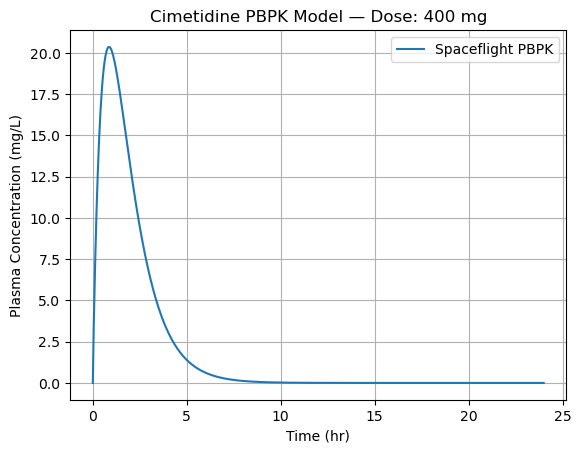

{'AUC': 50.59511457904006, 'Cmax': 20.36634647072137, 'Tmax': 0.8648648648648649, 'Half-life': 0.8395473004752362, 'CL/F': 4.0003862365764435}


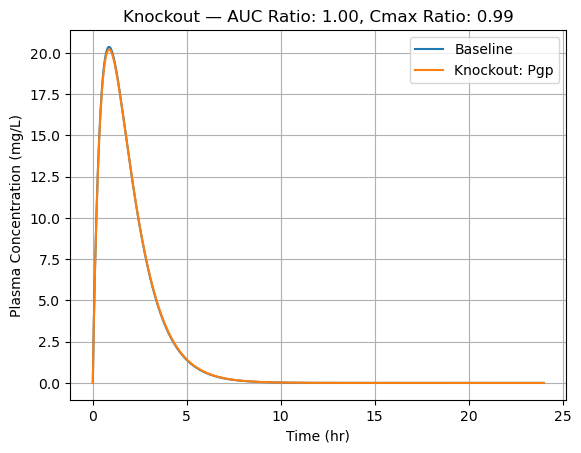

{'auc_ratio': 1.000000189311634, 'cmax_ratio': 0.9926806318646282}

In [32]:
from CimetidineKineticModel import CimetidineKineticModel

# Example: your final averaged logFC dict
logFC = {
    'Pgp': 0.0821,
    'CYP1A2': -0.2293,
    'CYP2C9': -0.1893,
    'CYP2D6': 0.0169,
    'OCT1': -0.0113,
    'OCT3': 0.0860,
    'MATE1': -0.0164
}

model = CimetidineKineticModel(logFC_dict=logFC)
model.plot_model(label="Spaceflight PBPK")
print(model.calculate_pk_metrics())

# Or run knockouts:
model.knockout(['Pgp'])


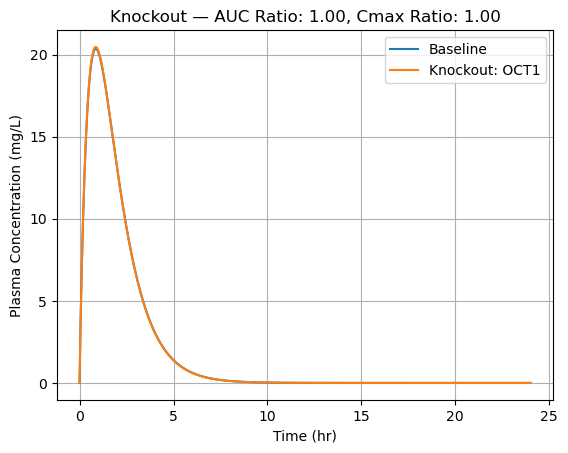

{'auc_ratio': 1.000000034672074, 'cmax_ratio': 1.0049617778603175}

In [33]:
model.knockout(['OCT1'])



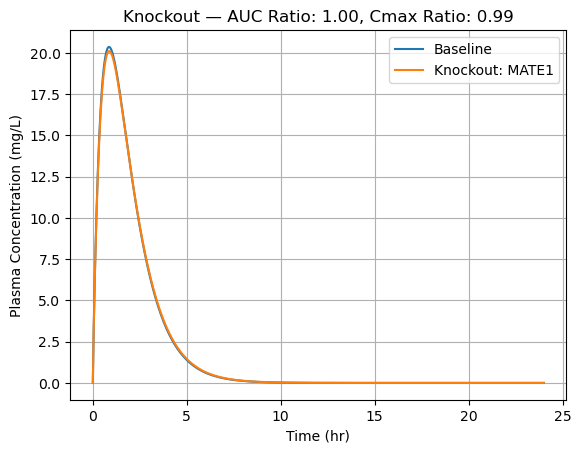

{'auc_ratio': 1.0000001648423829, 'cmax_ratio': 0.9874986753515528}

In [34]:
model.knockout(['MATE1'])


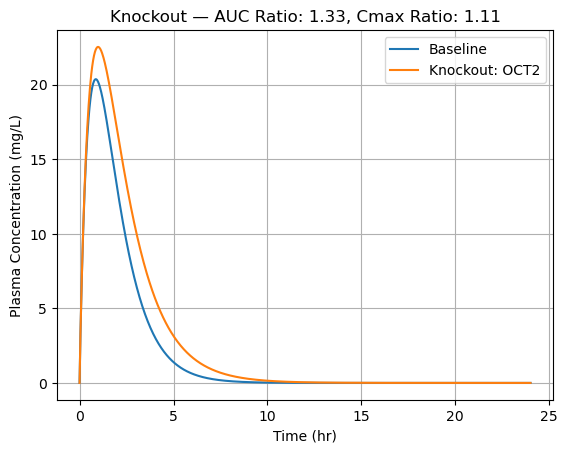

{'auc_ratio': 1.3333647994254976, 'cmax_ratio': 1.1062867141788335}

In [35]:
model.knockout(['OCT2'])

In [37]:
# Example: get baseline CL from your PBPK model instance
baseline_cl = {
    'Pgp': model.CL_Pgp,
    'CYP1A2': model.CL_CYP1A2,
    'CYP2C9': model.CL_CYP2C9,
    'CYP2D6': model.CL_CYP2D6,
    'OCT1': model.CL_OCT1,
    'OCT3': model.CL_OCT3,
    'MATE1': model.CL_MATE1
}

# Your logFC dict for microgravity + cimetidine
logFC_dict = {
    'Pgp': 0.1,
    'CYP1A2': -0.2293,
    'CYP2C9': -0.1893,
    'CYP2D6': 0.0169,
    'OCT1': -0.0113,
    'OCT3': 0.0860,
    'MATE1': -0.0164
}

adjusted_cl = {}
percent_change = {}

for enzyme, base_cl in baseline_cl.items():
    fc = 2 ** logFC_dict.get(enzyme, 0.0)
    adjusted_cl[enzyme] = base_cl * fc
    percent_change[enzyme] = ((adjusted_cl[enzyme] - base_cl) / base_cl) * 100

print("Adjusted CL:", adjusted_cl)
print("Percent change:", percent_change)


AttributeError: 'CimetidineKineticModel' object has no attribute 'CL_Pgp'

In [38]:
import importlib
import CimetidineKineticModel
importlib.reload(CimetidineKineticModel)
from CimetidineKineticModel import CimetidineKineticModel

# Cell 2: Test the model
model = CimetidineKineticModel()
print("CL_Pgp:", model.CL_Pgp)  # Should print 1.5

# Cell 3: Test with your logFC data
clean_logFC = {
    'OCT1': -0.011315867,
    'OCT3': 0.0860044,
    'MATE1': -0.016441425,
    'Pgp': 0.08207506625,
    'CYP1A2': -0.2293257425,
    'CYP2C9': -0.1893353167,
    'CYP2D6': 0.016903843
}

mg_model = CimetidineKineticModel(logFC_dict=clean_logFC)
print("CL_Pgp after logFC:", mg_model.CL_Pgp)  # Should print ~1.62

CL_Pgp: 1.5
CL_Pgp after logFC: 1.5878092069877985


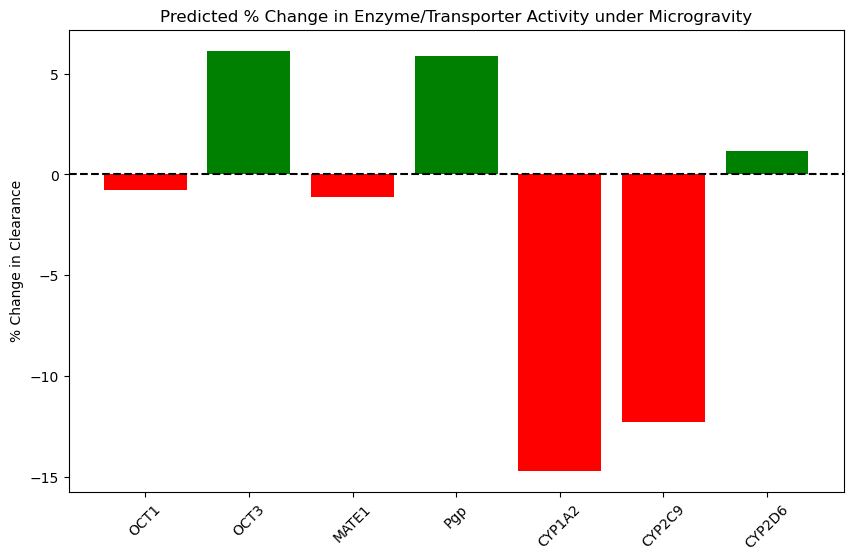

In [39]:
import matplotlib.pyplot as plt

# Create baseline model
model_baseline = CimetidineKineticModel()

# Create microgravity model with your logFC
clean_logFC = {
    'OCT1': -0.011315867,
    'OCT3': 0.0860044,
    'MATE1': -0.016441425,
    'Pgp': 0.08207506625,
    'CYP1A2': -0.2293257425,
    'CYP2C9': -0.1893353167,
    'CYP2D6': 0.016903843
}

model_mg = CimetidineKineticModel(logFC_dict=clean_logFC)

# Get base and adjusted CLs
enzymes = ['OCT1', 'OCT3', 'MATE1', 'Pgp', 'CYP1A2', 'CYP2C9', 'CYP2D6']

base_cls = []
adjusted_cls = []
percent_changes = []

for enz in enzymes:
    attr = f'CL_{enz}'
    base_cl = getattr(model_baseline, attr)
    adj_cl = getattr(model_mg, attr)
    base_cls.append(base_cl)
    adjusted_cls.append(adj_cl)
    percent_changes.append(((adj_cl - base_cl) / base_cl) * 100)

# Plot
plt.figure(figsize=(10,6))
plt.bar(enzymes, percent_changes, color=['green' if x > 0 else 'red' for x in percent_changes])
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('% Change in Clearance')
plt.title('Predicted % Change in Enzyme/Transporter Activity under Microgravity')
plt.xticks(rotation=45)
plt.show()


In [41]:
import pandas as pd

# Load CSV with no header
obs_df = pd.read_csv('cimetidine_obs.csv', header=None, names=['Time', 'Concentration'])

print(obs_df.head())

# Extract arrays
clinical_time = obs_df['Time'].values
clinical_conc = obs_df['Concentration'].values

print("Time:", clinical_time)
print("Concentration:", clinical_conc)


       Time  Concentration
0  0.258686       0.320915
1  0.223531       0.212203
2  0.510974       1.493203
3  0.509142       1.089909
4  0.777808       2.434220
Time: [0.25868636 0.2235311  0.51097364 0.50914222 0.7778084  0.75330144
 1.00418991 1.04818578 1.48242128 1.51565092 2.02645333 3.00973447
 3.0054955  4.00716673 6.0012686  7.99241029 9.99344624]
Concentration: [0.32091507 0.21220325 1.49320293 1.08990877 2.43422037 1.90347214
 2.05215902 2.43797956 2.17360259 2.33532481 2.08815561 2.18183791
 1.96395414 1.42854687 0.63472877 0.28993272 0.14235088]


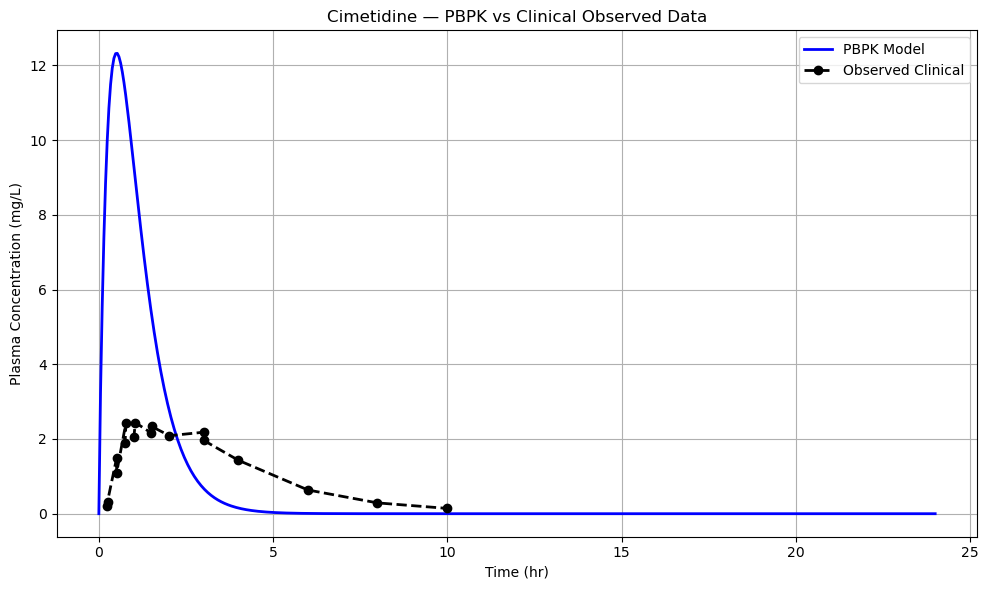

In [42]:
import matplotlib.pyplot as plt
from CimetidineKineticModel import CimetidineKineticModel

# Simulate your PBPK model (baseline or with logFC)
model = CimetidineKineticModel()
t_model, C_plasma_model = model.simulate(duration=24, points=500)

plt.figure(figsize=(10, 6))

# PBPK model prediction
plt.plot(t_model, C_plasma_model, label="PBPK Model", color='blue', linewidth=2)

# Actual clinical observations
plt.plot(clinical_time, clinical_conc, label="Observed Clinical", 
         color='black', linestyle='--', marker='o', linewidth=2)

plt.xlabel("Time (hr)")
plt.ylabel("Plasma Concentration (mg/L)")
plt.title("Cimetidine — PBPK vs Clinical Observed Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
# --- PK model ODE function ---
def pk_model(y, t, ka, Vd, CL):
    """
    y[0] = A_gut : amount in gut (mg)
    y[1] = A_central : amount in central compartment (mg)
    """
    A_gut, A_central = y

    dA_gut_dt = -ka * A_gut
    dA_central_dt = ka * A_gut - (CL / Vd) * A_central

    return [dA_gut_dt, dA_central_dt]


In [48]:
def simulate_conc(params, time_points):
    ka, Vd, CL = params
    dose = 400  # mg oral dose
    y0 = [dose, 0]  # initial amounts: all in gut, none in plasma

    time_points = np.array(time_points)
    time_points = np.sort(time_points)

    y = odeint(pk_model, y0, time_points, args=(ka, Vd, CL))
    A_central = y[:, 1]
    conc = A_central / Vd  # convert amount to concentration
    return conc


Optimized parameters:
ka: 1.7170  Vd: 113.5644  CL: 34.0225


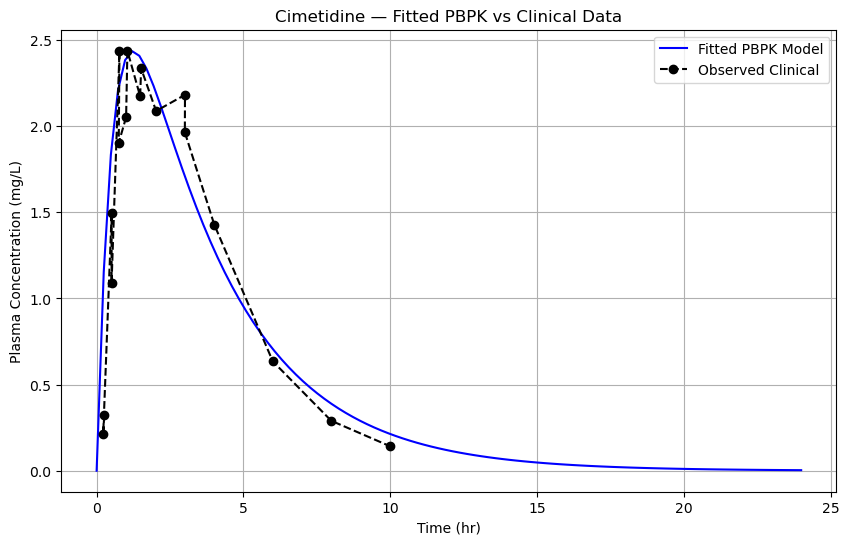

In [49]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Load clinical data
clinical_df = pd.read_csv("cimetidine_obs.csv", header=None, names=["Time", "Conc"])
time_obs = clinical_df["Time"].values
conc_obs = clinical_df["Conc"].values

# --- PBPK model function ---
def pbpk_model(y, t, ka, Vd, CL):
    A_gut, A_central = y
    dA_gut_dt = -ka * A_gut
    dA_central_dt = ka * A_gut - (CL / Vd) * A_central
    return [dA_gut_dt, dA_central_dt]

def simulate_conc(params, time_points):
    ka, Vd, CL = params
    A_gut_0 = 400  # Dose in mg
    A_central_0 = 0
    y0 = [A_gut_0, A_central_0]

    sol = odeint(pbpk_model, y0, time_points, args=(ka, Vd, CL))
    conc = sol[:,1] / Vd
    return conc

def simulate_conc(params, time_points):
    ka, Vd, CL = params
    dose = 400  # mg oral dose
    y0 = [dose, 0]  # initial amounts: all in gut, none in plasma

    time_points = np.array(time_points)
    time_points = np.sort(time_points)

    y = odeint(pk_model, y0, time_points, args=(ka, Vd, CL))
    A_central = y[:, 1]
    conc = A_central / Vd  # convert amount to concentration
    return conc



# --- Initial guesses ---
initial_params = [1.0, 50.0, 10.0]  # [ka, Vd, CL]
bounds = [(0.01, 5.0), (1.0, 500.0), (0.1, 100.0)]

# --- Run optimization ---
result = minimize(objective, initial_params, bounds=bounds, method='L-BFGS-B')

best_params = result.x
print("Optimized parameters:")
print(f"ka: {best_params[0]:.4f}  Vd: {best_params[1]:.4f}  CL: {best_params[2]:.4f}")

# --- Plot fitted curve ---
time_sim = np.linspace(0, 24, 100)
conc_fit = simulate_conc(best_params, time_sim)

plt.figure(figsize=(10,6))
plt.plot(time_sim, conc_fit, label='Fitted PBPK Model', color='blue')
plt.plot(time_obs, conc_obs, 'ko--', label='Observed Clinical')
plt.xlabel('Time (hr)')
plt.ylabel('Plasma Concentration (mg/L)')
plt.title('Cimetidine — Fitted PBPK vs Clinical Data')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
print(f"Optimized ka: {best_params[0]:.4f} 1/h")
print(f"Optimized Vd: {best_params[1]:.2f} L")
print(f"Optimized CL: {best_params[2]:.2f} L/h")


Optimized ka: 1.7170 1/h
Optimized Vd: 113.56 L
Optimized CL: 34.02 L/h


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import odeint
from scipy import trapz

# -----------------------------
# 1) Load clinical data
# -----------------------------
# Example: your CSV with no headers: time in 1st col, conc in 2nd col
clinical_df = pd.read_csv('cimetidine_obs.csv', header=None)
time_obs = clinical_df.iloc[:, 0].values
conc_obs = clinical_df.iloc[:, 1].values

# -----------------------------
# 2) Define PBPK model (1-comp)
# -----------------------------
def pk_model(y, t, ka, Vd, CL, Dose):
    A_gut, A_central = y
    dA_gut_dt = -ka * A_gut
    dA_central_dt = ka * A_gut - (CL / Vd) * A_central
    return [dA_gut_dt, dA_central_dt]

def simulate_pk(t, ka, Vd, CL, Dose):
    y0 = [Dose, 0]
    sol = odeint(pk_model, y0, t, args=(ka, Vd, CL, Dose))
    A_central = sol[:, 1]
    Cp = A_central / Vd
    return Cp

# -----------------------------
# 3) Objective: sum of squared errors
# -----------------------------
def objective(params, t, obs, Dose):
    ka, Vd, CL = params
    pred = simulate_pk(t, ka, Vd, CL, Dose)
    sse = np.sum((obs - pred)**2)
    return sse

# -----------------------------
# 4) Fit parameters
# -----------------------------
Dose = 400  # mg

# Initial guesses: [ka, Vd, CL]
initial_params = [1.0, 100.0, 20.0]
bounds = [(0.01, 5.0), (1.0, 500.0), (0.1, 100.0)]

result = minimize(objective, initial_params, args=(time_obs, conc_obs, Dose), bounds=bounds, method='L-BFGS-B')
ka_fit, Vd_fit, CL_fit = result.x

print(f"✅ Optimized ka: {ka_fit:.4f} 1/h")
print(f"✅ Optimized Vd: {Vd_fit:.2f} L")
print(f"✅ Optimized CL: {CL_fit:.2f} L/h")

# -----------------------------
# 5) Simulate with fitted params
# -----------------------------
t_sim = np.linspace(0, 24, 100)
Cp_sim = simulate_pk(t_sim, ka_fit, Vd_fit, CL_fit, Dose)

# -----------------------------
# 6) Calculate metrics
# -----------------------------
AUC = trapz(Cp_sim, t_sim)
Cmax = np.max(Cp_sim)
Tmax = t_sim[np.argmax(Cp_sim)]

print(f"✅ AUC: {AUC:.2f} mg*h/L")
print(f"✅ Cmax: {Cmax:.2f} mg/L")
print(f"✅ Tmax: {Tmax:.2f} h")

# -----------------------------
# 7) Plot observed vs fitted
# -----------------------------
plt.figure(figsize=(10,6))
plt.plot(t_sim, Cp_sim, label="Fitted PBPK Model", color='blue')
plt.plot(time_obs, conc_obs, 'ko--', label="Observed Clinical")
plt.xlabel("Time (h)")
plt.ylabel("Plasma Concentration (mg/L)")
plt.title("Cimetidine — Fitted PBPK vs Clinical Observed")
plt.legend()
plt.grid(True)
plt.show()


ImportError: cannot import name 'trapz' from 'scipy' (/opt/anaconda3/lib/python3.12/site-packages/scipy/__init__.py)

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import odeint
from numpy import trapz  # ✅ This is correct!


In [87]:
# Example: your CSV with no headers: time in 1st col, conc in 2nd col
clinical_df = pd.read_csv('cimetidine_obs.csv', header=None)
time_obs = clinical_df.iloc[:, 0].values
conc_obs = clinical_df.iloc[:, 1].values



In [88]:
print(clinical_df.columns)


Index([0, 1], dtype='int64')


In [89]:
# Extract time and concentration using integer indices
time_values = clinical_df[0].values
concentration_values = clinical_df[1].values

In [90]:
from numpy import trapz

auc = trapz(concentration_values, time_values)
print("AUC:", auc)

AUC: 10.65440549474189


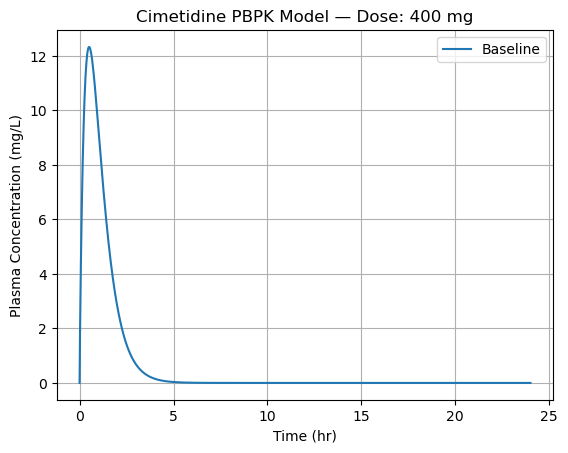

In [67]:
# Baseline simulation
model = CimetidineKineticModel()
t, C_plasma = model.simulate()
model.plot_model()



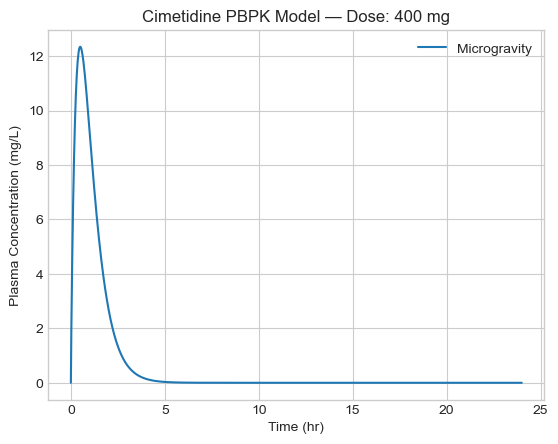

In [91]:
# Apply microgravity-induced expression changes
logFC_microgravity = {
    'OCT1': -0.5,    # Reduced hepatic uptake
    'MATE1': 0.3,    # Increased hepatic efflux
    'CYP3A4': -0.2   # Reduced metabolism
}
model_micro = CimetidineKineticModel(logFC_dict=logFC_microgravity)
model_micro.plot_model(label='Microgravity')


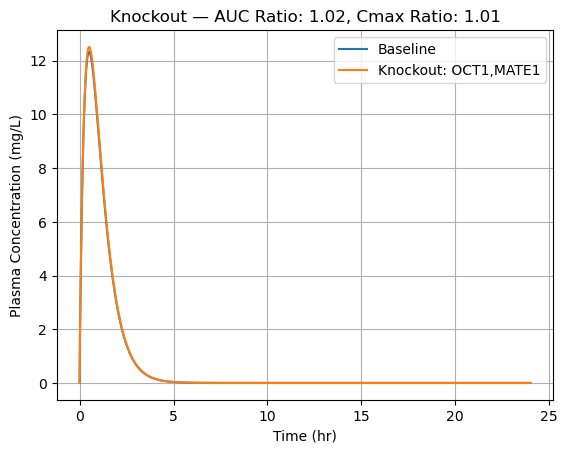

AUC ratio: 1.02
Cmax ratio: 1.01


In [69]:
# Assess impact of transporter knockout
results = model.knockout(['OCT1', 'MATE1'])
print(f"AUC ratio: {results['auc_ratio']:.2f}")
print(f"Cmax ratio: {results['cmax_ratio']:.2f}")


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import odeint
from numpy import trapz  # ✅ This is correct!


In [93]:
# Core dependencies
import numpy as np
import matplotlib.pyplot as plt
from CimetidineKineticModel import CimetidineKineticModel

import matplotlib.pyplot as plt

plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [94]:
plt.style.use('seaborn-v0_8-whitegrid')


In [95]:
import seaborn as sns

sns.set_style('whitegrid')

In [96]:
import importlib
import CimetidineKineticModel
importlib.reload(CimetidineKineticModel)
from CimetidineKineticModel import CimetidineKineticModel


In [97]:
# Always reload after edits!
import importlib
import CimetidineKineticModel
importlib.reload(CimetidineKineticModel)
from CimetidineKineticModel import CimetidineKineticModel

# Make sure it works
model = CimetidineKineticModel()
print("✅ Model created!")


✅ Model created!


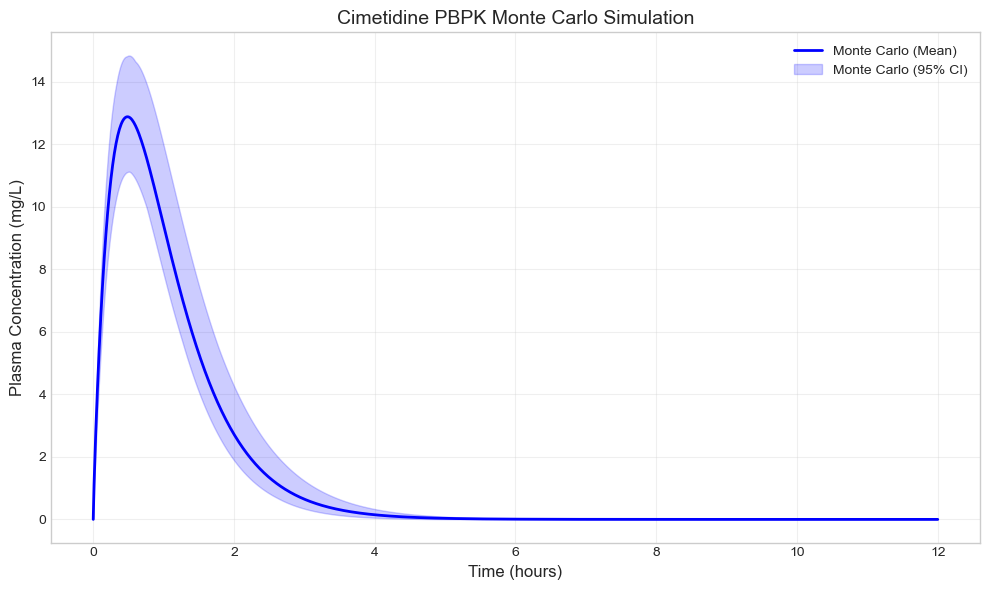

(array([ 0.        ,  0.01201201,  0.02402402,  0.03603604,  0.04804805,
         0.06006006,  0.07207207,  0.08408408,  0.0960961 ,  0.10810811,
         0.12012012,  0.13213213,  0.14414414,  0.15615616,  0.16816817,
         0.18018018,  0.19219219,  0.2042042 ,  0.21621622,  0.22822823,
         0.24024024,  0.25225225,  0.26426426,  0.27627628,  0.28828829,
         0.3003003 ,  0.31231231,  0.32432432,  0.33633634,  0.34834835,
         0.36036036,  0.37237237,  0.38438438,  0.3963964 ,  0.40840841,
         0.42042042,  0.43243243,  0.44444444,  0.45645646,  0.46846847,
         0.48048048,  0.49249249,  0.5045045 ,  0.51651652,  0.52852853,
         0.54054054,  0.55255255,  0.56456456,  0.57657658,  0.58858859,
         0.6006006 ,  0.61261261,  0.62462462,  0.63663664,  0.64864865,
         0.66066066,  0.67267267,  0.68468468,  0.6966967 ,  0.70870871,
         0.72072072,  0.73273273,  0.74474474,  0.75675676,  0.76876877,
         0.78078078,  0.79279279,  0.8048048 ,  0.8

In [81]:
# Small Monte Carlo test
model.plot_monte_carlo(n_sim=10, duration=12, seed=42)


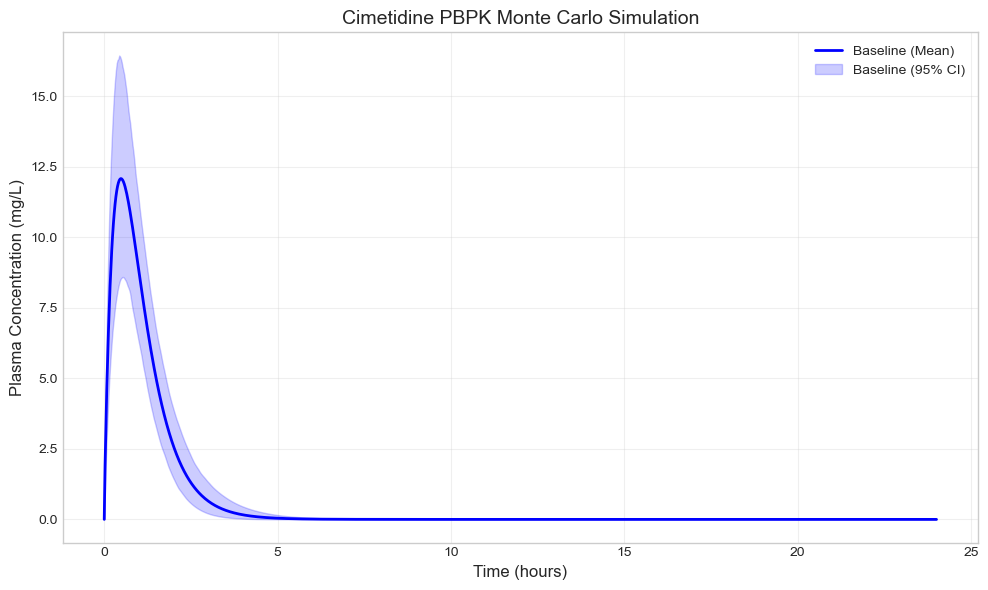

In [82]:
# Baseline
t, mean_C, lower_CI, upper_CI = model.plot_monte_carlo(
    n_sim=500,
    duration=24,
    seed=42,
    label='Baseline'
)


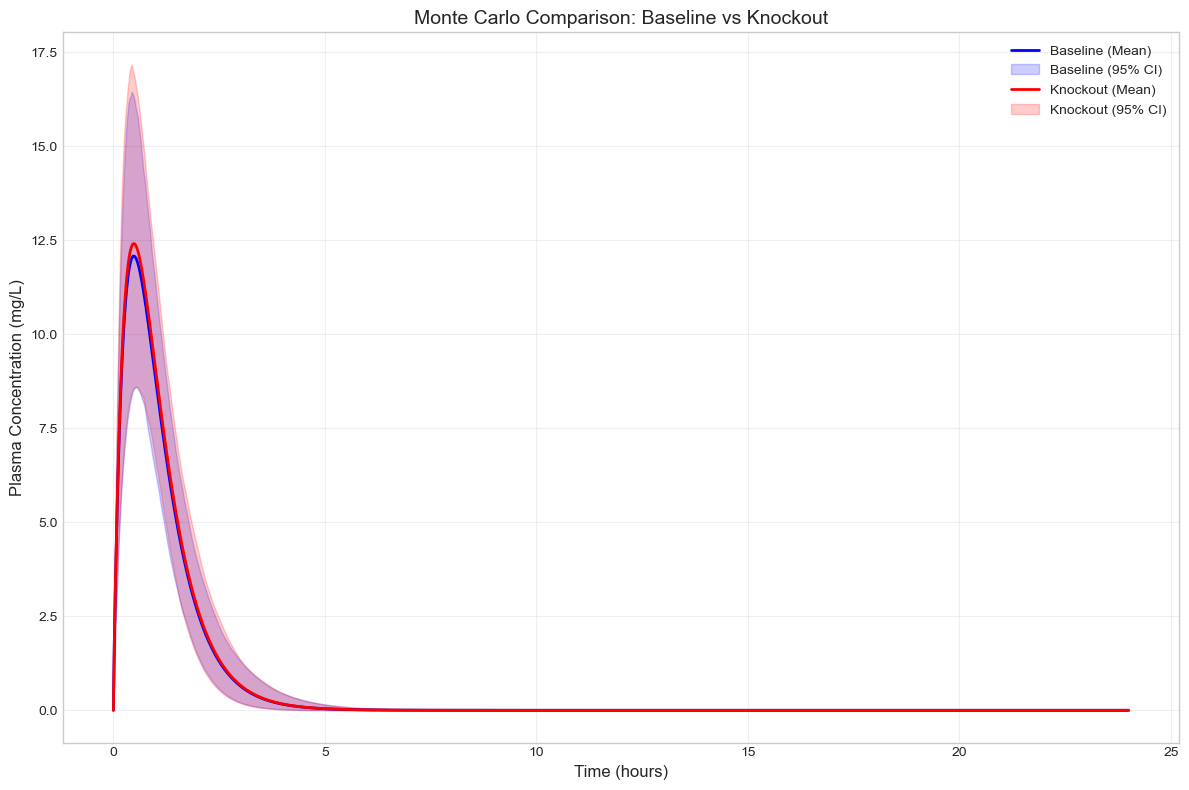

📊 Monte Carlo Comparison Summary:
   Baseline AUC: 16.93 mg·hr/L
   Knockout AUC: 17.42 mg·hr/L
   AUC Ratio: 1.03
   Baseline Cmax: 12.09 mg/L
   Knockout Cmax: 12.42 mg/L
   Cmax Ratio: 1.03


{'baseline': (array([ 0.        ,  0.02402402,  0.04804805,  0.07207207,  0.0960961 ,
          0.12012012,  0.14414414,  0.16816817,  0.19219219,  0.21621622,
          0.24024024,  0.26426426,  0.28828829,  0.31231231,  0.33633634,
          0.36036036,  0.38438438,  0.40840841,  0.43243243,  0.45645646,
          0.48048048,  0.5045045 ,  0.52852853,  0.55255255,  0.57657658,
          0.6006006 ,  0.62462462,  0.64864865,  0.67267267,  0.6966967 ,
          0.72072072,  0.74474474,  0.76876877,  0.79279279,  0.81681682,
          0.84084084,  0.86486486,  0.88888889,  0.91291291,  0.93693694,
          0.96096096,  0.98498498,  1.00900901,  1.03303303,  1.05705706,
          1.08108108,  1.10510511,  1.12912913,  1.15315315,  1.17717718,
          1.2012012 ,  1.22522523,  1.24924925,  1.27327327,  1.2972973 ,
          1.32132132,  1.34534535,  1.36936937,  1.39339339,  1.41741742,
          1.44144144,  1.46546547,  1.48948949,  1.51351351,  1.53753754,
          1.56156156,  1.5

In [83]:
# Example: knockout OCT1 transporter
knockout_logFC = {'OCT1': -10}

# Comparison plot with CIs
model.plot_monte_carlo_comparison(
    baseline_logFC=None, 
    knockout_logFC=knockout_logFC,
    n_sim=500,
    duration=24,
    seed=42
)


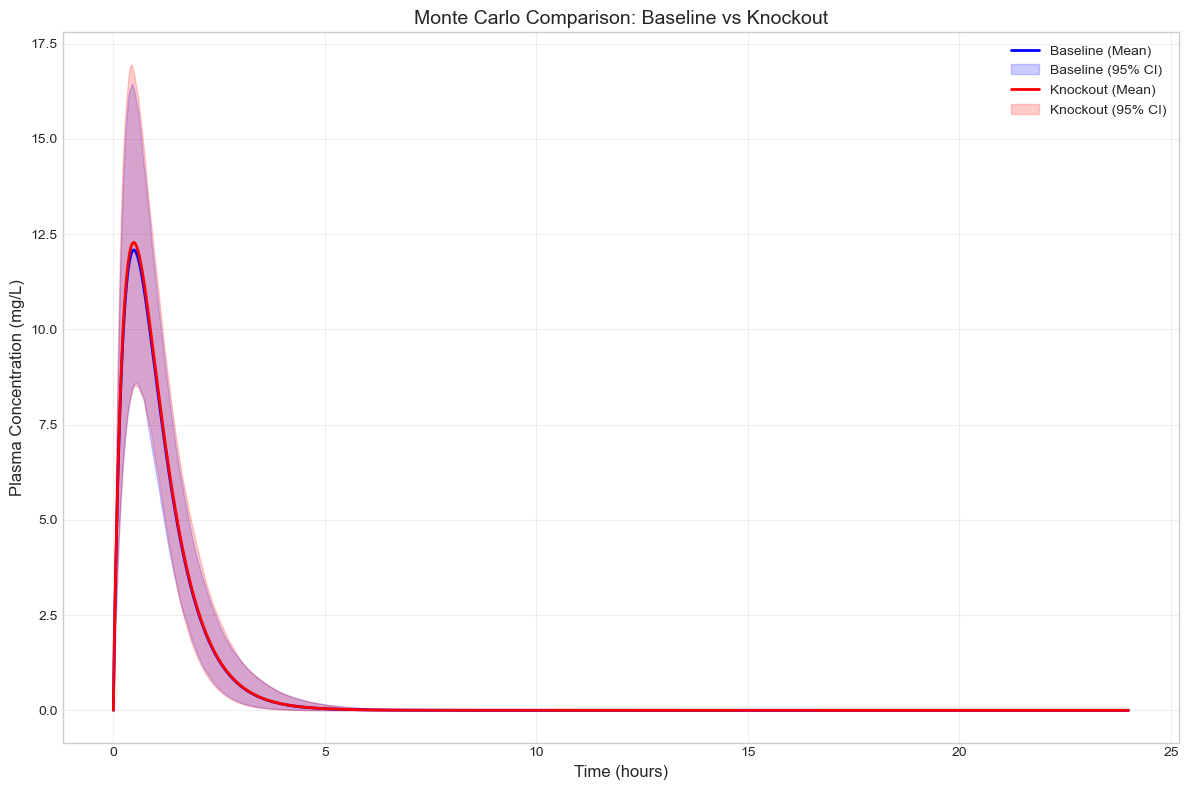

📊 Monte Carlo Comparison Summary:
   Baseline AUC: 16.93 mg·hr/L
   Knockout AUC: 17.19 mg·hr/L
   AUC Ratio: 1.02
   Baseline Cmax: 12.09 mg/L
   Knockout Cmax: 12.28 mg/L
   Cmax Ratio: 1.02


{'baseline': (array([ 0.        ,  0.02402402,  0.04804805,  0.07207207,  0.0960961 ,
          0.12012012,  0.14414414,  0.16816817,  0.19219219,  0.21621622,
          0.24024024,  0.26426426,  0.28828829,  0.31231231,  0.33633634,
          0.36036036,  0.38438438,  0.40840841,  0.43243243,  0.45645646,
          0.48048048,  0.5045045 ,  0.52852853,  0.55255255,  0.57657658,
          0.6006006 ,  0.62462462,  0.64864865,  0.67267267,  0.6966967 ,
          0.72072072,  0.74474474,  0.76876877,  0.79279279,  0.81681682,
          0.84084084,  0.86486486,  0.88888889,  0.91291291,  0.93693694,
          0.96096096,  0.98498498,  1.00900901,  1.03303303,  1.05705706,
          1.08108108,  1.10510511,  1.12912913,  1.15315315,  1.17717718,
          1.2012012 ,  1.22522523,  1.24924925,  1.27327327,  1.2972973 ,
          1.32132132,  1.34534535,  1.36936937,  1.39339339,  1.41741742,
          1.44144144,  1.46546547,  1.48948949,  1.51351351,  1.53753754,
          1.56156156,  1.5

In [84]:
# Knockout OCT1 and MATE1
knockout_logFC = {'OCT1': -10, 'MATE1': -10}

# Apply it in comparison
model.plot_monte_carlo_comparison(
    baseline_logFC=None,
    knockout_logFC=knockout_logFC,
    n_sim=500,
    duration=24,
    seed=42
)
